In [247]:
#imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [248]:
#reading data
ps = pd.read_csv("./data/public-safety.csv")
ps

,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
0,Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
1,Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
2,Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
3,Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
4,Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Upper Lawrenceville,13,"2,669",92,184,73,3.4,6.9,0,0,12,9,24,12,29
86,West End,4,254,23,54,66,9.1,21.3,0,1,2,3,7,3,30
87,West Oakland,14,"2,604",82,65,80,3.1,2.5,1,1,13,4,14,8,13
88,Westwood,4,"3,066",57,53,44,1.9,1.7,0,1,1,4,17,6,3


In [249]:
#removing unneccessary columns
ps = ps.drop(columns=["Sector #", "Part 1 Crime per 100 Persons (2010)", "Part 2 Crime per 100 Persons (2010)"])
ps

,Neighborhood,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
0,Allegheny Center,933,71,141,46,0,2,9,5,8,5,31
1,Allegheny West,462,38,49,31,1,0,4,6,6,4,12
2,Allentown,"2,500",159,252,160,0,2,15,23,48,11,66
3,Arlington,"1,869",50,84,48,0,1,8,5,15,7,9
4,Arlington Heights,244,19,37,24,0,0,4,5,5,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
85,Upper Lawrenceville,"2,669",92,184,73,0,0,12,9,24,12,29
86,West End,254,23,54,66,0,1,2,3,7,3,30
87,West Oakland,"2,604",82,65,80,1,1,13,4,14,8,13
88,Westwood,"3,066",57,53,44,0,1,1,4,17,6,3


In [250]:
#relabeling 
names = {"Neighborhood":"Neighborhood", "Population (2010)":"Population", "#Part 1 (Major Crime) Reports (2010)":"Major Crime Reports", "#Part 2 Reports (2010)":"Reports", "#Other Police Reports (2010)":"Other Reports", "#Murder (2010)":"Murder", "#Rape (2010)": "Rape", "#Robbery (2010)":"Robbery", "#Agr. Assault (2010)":"Aggrevated Assault", "#Burglary (2010)":"Burglary", "#Auto Theft (2010)":"Auto Theft", "#Drug Violations (2010)":"Drug Violations"}
ps.rename(columns=names, inplace=True)
ps

,Neighborhood,Population,Major Crime Reports,Reports,Other Reports,Murder,Rape,Robbery,Aggrevated Assault,Burglary,Auto Theft,Drug Violations
0,Allegheny Center,933,71,141,46,0,2,9,5,8,5,31
1,Allegheny West,462,38,49,31,1,0,4,6,6,4,12
2,Allentown,"2,500",159,252,160,0,2,15,23,48,11,66
3,Arlington,"1,869",50,84,48,0,1,8,5,15,7,9
4,Arlington Heights,244,19,37,24,0,0,4,5,5,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
85,Upper Lawrenceville,"2,669",92,184,73,0,0,12,9,24,12,29
86,West End,254,23,54,66,0,1,2,3,7,3,30
87,West Oakland,"2,604",82,65,80,1,1,13,4,14,8,13
88,Westwood,"3,066",57,53,44,0,1,1,4,17,6,3


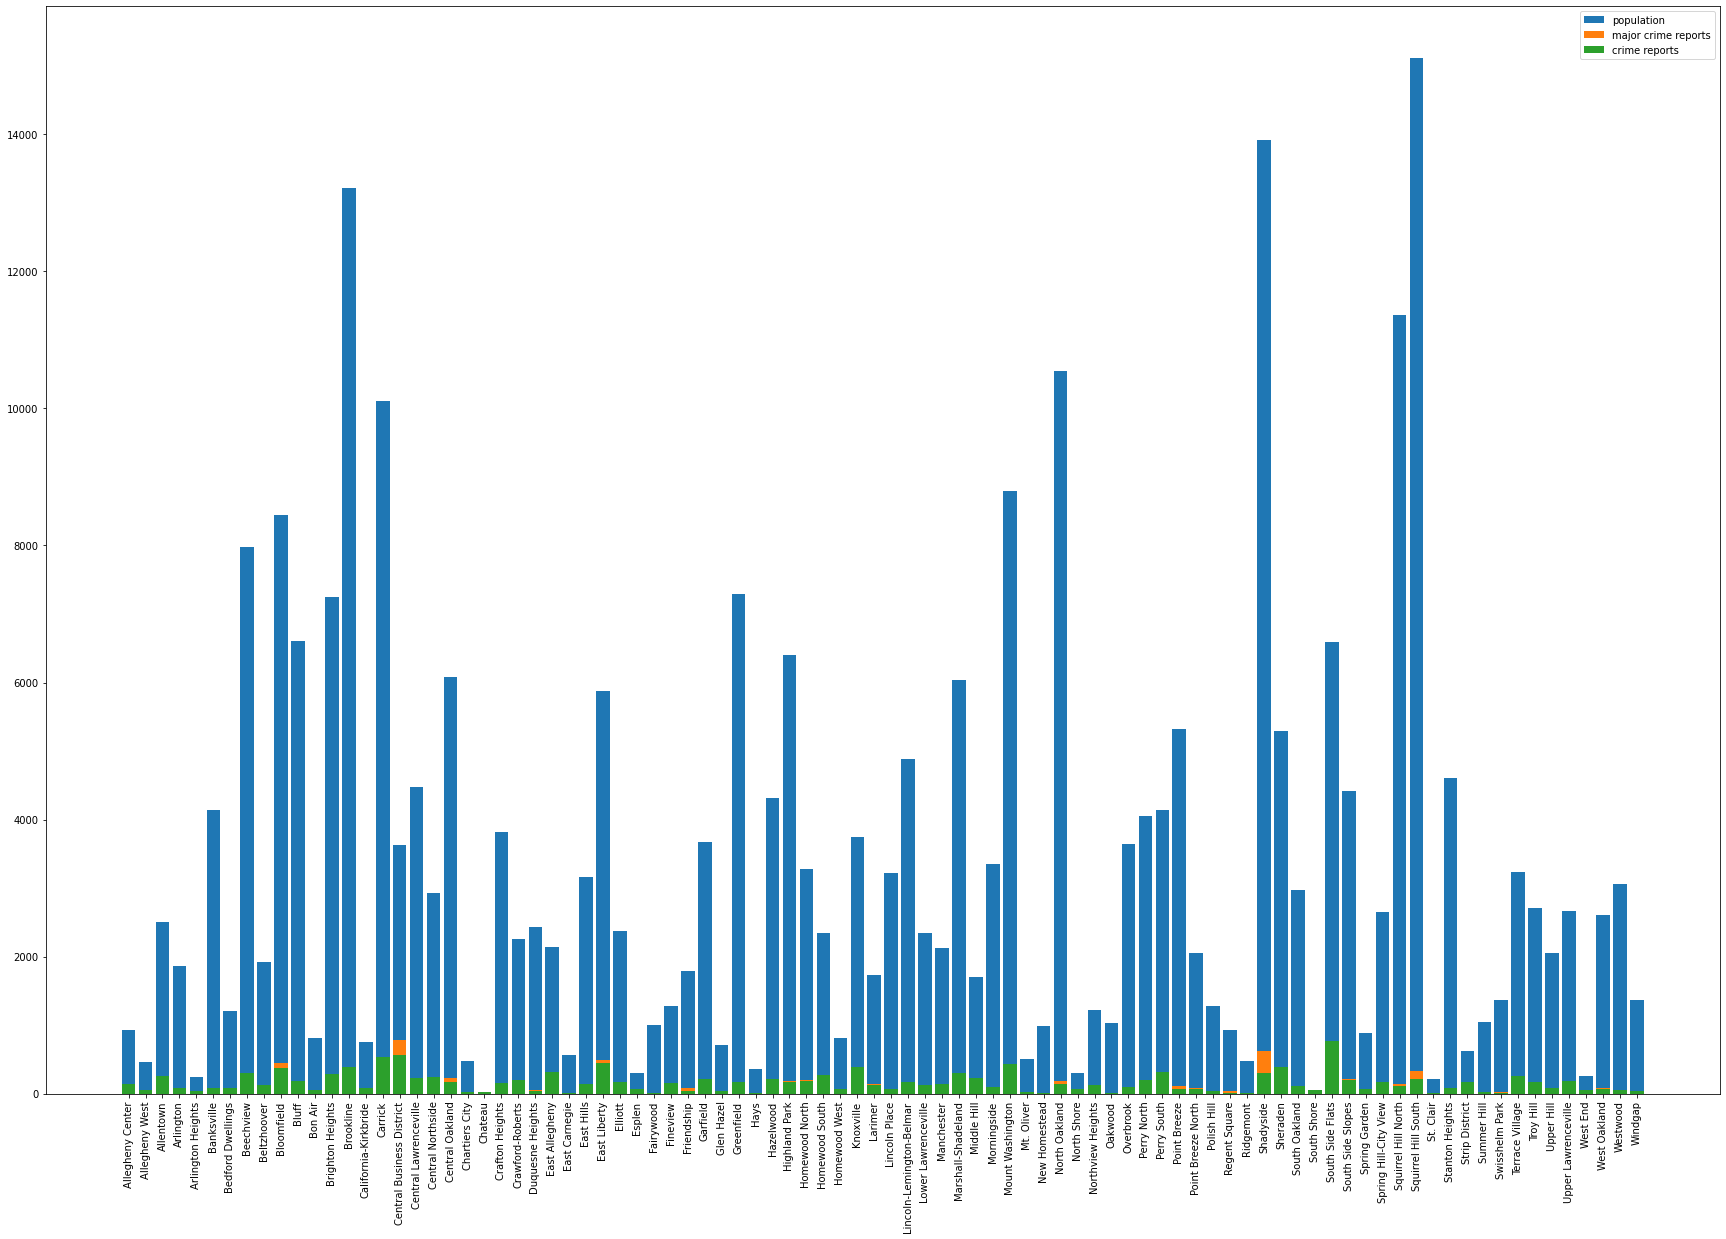

In [251]:
#population plot and reporting rates
population = ps["Population"].str.replace(",", "").astype(float)
neighborhood = ps["Neighborhood"]
major_reps = ps["Major Crime Reports"]
reps = ps["Reports"]
plt.figure(figsize = (30,20))
plt.xticks(rotation = 90)
plt.bar(neighborhood, population, color = "C0", label = "population")
plt.bar(neighborhood, major_reps, color = "C1", label = "major crime reports")
plt.bar(neighborhood, reps, color = "C2", label = "crime reports")
plt.legend()

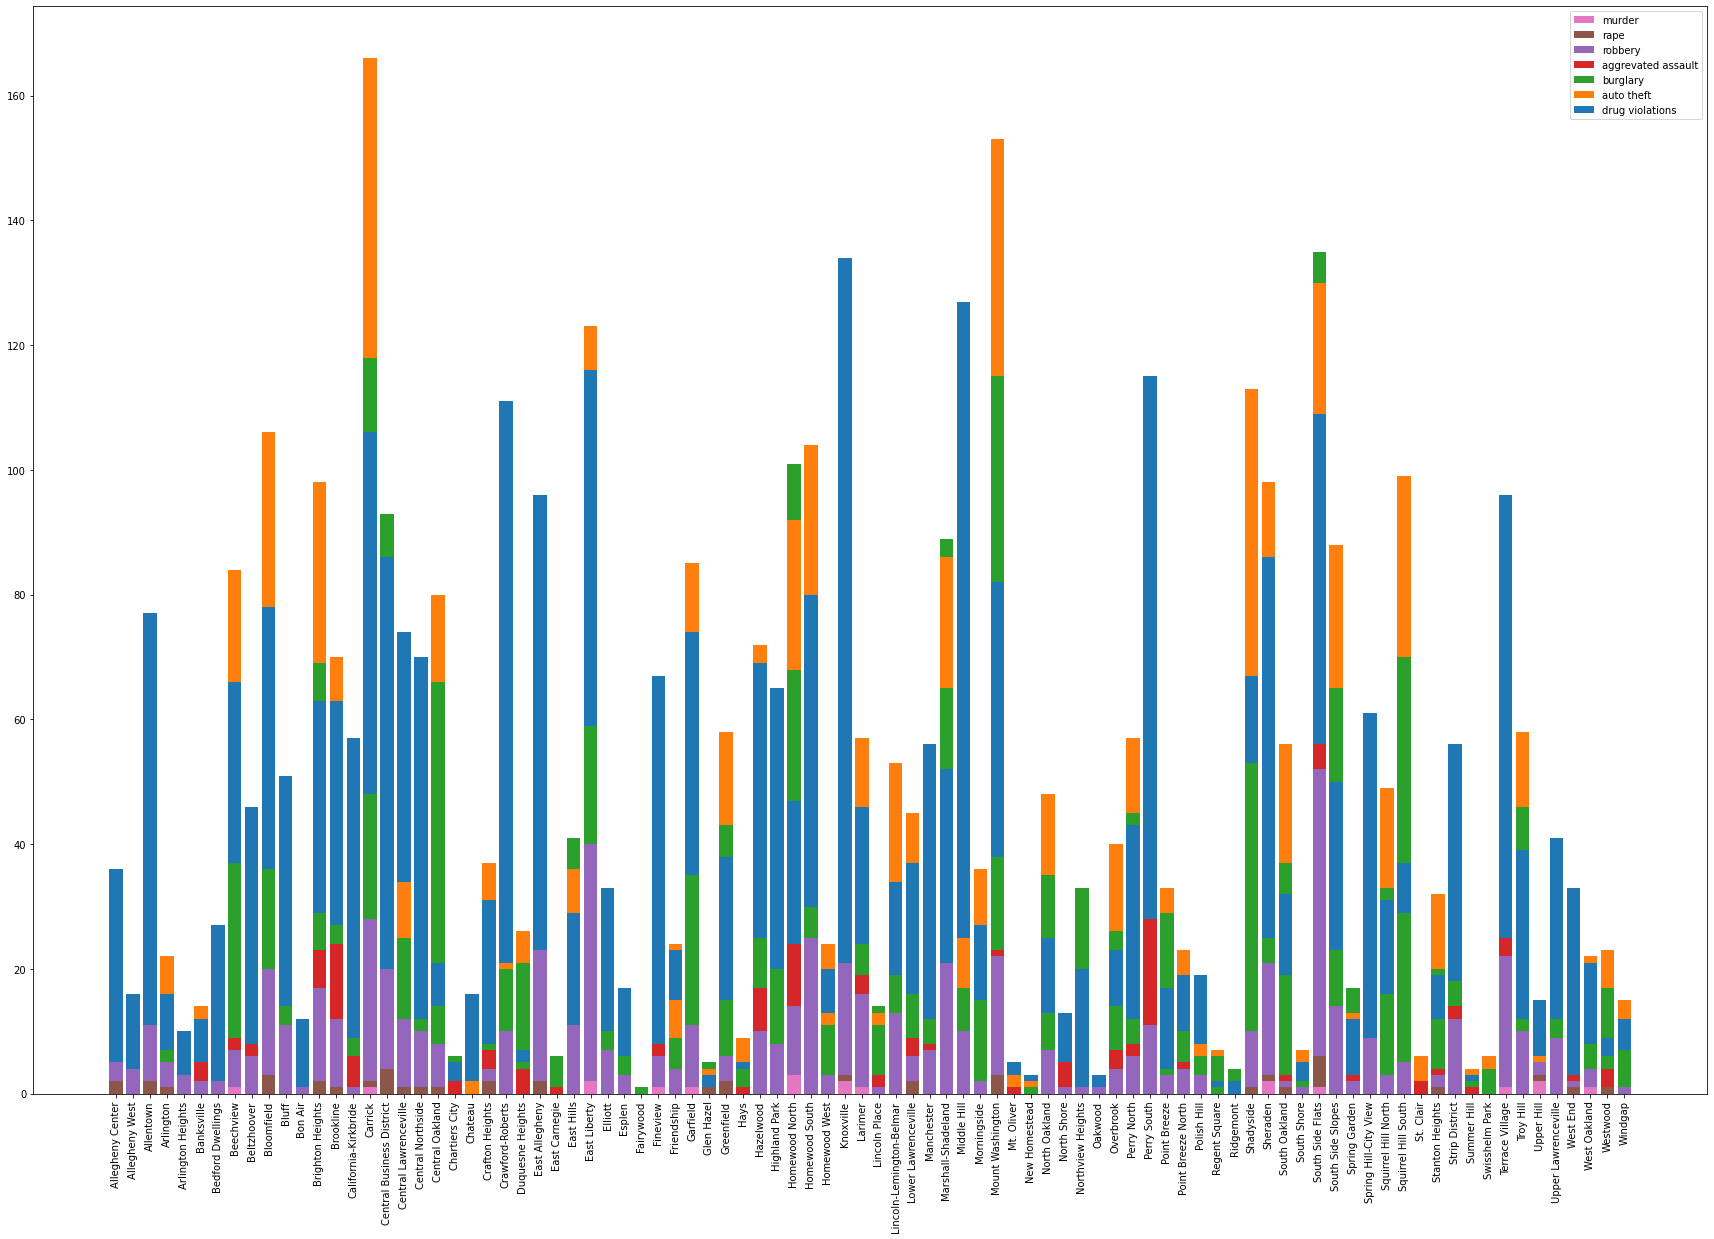

In [252]:
murder = ps["Murder"]
rape = ps["Rape"]
robbery	= ps["Robbery"]
aggrevated_Assault = ps["Aggrevated Assault"]	
burglary = ps["Burglary"]	
auto_Theft = ps["Auto Theft"]
drug_Violations = ps["Drug Violations"]
plt.figure(figsize = (30,20))
plt.xticks(rotation = 90)
plt.bar(neighborhood, murder, color="C6", label = "murder")
plt.bar(neighborhood, rape, color="C5", bottom=murder, label = "rape")
plt.bar(neighborhood, robbery, color="C4", bottom=rape, label = "robbery")
plt.bar(neighborhood, aggrevated_Assault, color="C3", bottom=robbery, label = "aggrevated assault")
plt.bar(neighborhood, burglary, color="C2", bottom=aggrevated_Assault, label = "burglary")
plt.bar(neighborhood, auto_Theft, color="C1", bottom=burglary, label = "auto theft")
plt.bar(neighborhood, drug_Violations, color="C0", bottom=auto_Theft, label = "drug violations")
plt.legend()

,Neighborhood,Population,Major Crime Reports,Reports,Other Reports,Murder,Rape,Robbery,Aggrevated Assault,Burglary,Auto Theft,Drug Violations
0,Allegheny Center,933,71,141,46,0,2,9,5,8,5,31
1,Allegheny West,462,38,49,31,1,0,4,6,6,4,12
2,Allentown,"2,500",159,252,160,0,2,15,23,48,11,66
3,Arlington,"1,869",50,84,48,0,1,8,5,15,7,9
4,Arlington Heights,244,19,37,24,0,0,4,5,5,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
85,Upper Lawrenceville,"2,669",92,184,73,0,0,12,9,24,12,29
86,West End,254,23,54,66,0,1,2,3,7,3,30
87,West Oakland,"2,604",82,65,80,1,1,13,4,14,8,13
88,Westwood,"3,066",57,53,44,0,1,1,4,17,6,3


In [253]:
#neghborgood class
class Neighborhood:
    def __init__(self, name, population, mu, ra, ro, ag, bu, au, dr):
        self.name = name
        self.population = population
        self.murder = mu
        self.rape = ra
        self.robbery = ro
        self.assault = ag
        self.burglary = bu
        self.auto = au
        self.drug = dr
        self.score = (self.murder + self.rape + self.robbery + self.assault + self.burglary + self.auto + self.drug)/int(self.population)
    def getScore(self):
        return self.score
    def getName(self):
        return self.name
    def getStats(self):
        info = self.name + ", " + str(self.population)
        return info

In [254]:
#making element class list
neighborhoods_list = []
for index, nh in ps.iterrows():
    nh_name = nh["Neighborhood"]
    nh_population = nh["Population"].replace(",", "")
    nh_murder = nh["Murder"]
    nh_rape = nh["Rape"]
    nh_robbery = nh["Robbery"]
    nh_assault = nh["Aggrevated Assault"]
    nh_burglary = nh["Burglary"]
    nh_auto = nh["Auto Theft"]
    nh_drug = nh["Drug Violations"]
    neighborhoods_elmnt = Neighborhood(nh_name, nh_population, nh_murder, nh_rape, nh_robbery, nh_assault, nh_burglary, nh_auto, nh_drug)
    neighborhoods_list.append(neighborhoods_elmnt)

In [255]:
from operator import itemgetter
names_and_scores = []
for nh in neighborhoods_list:
    name_score = []
    name_score.append(nh.getName())
    name_score.append(nh.getScore() * 100)
    names_and_scores.append(name_score)
sorted_names_and_scores = sorted(names_and_scores, key=itemgetter(1), reverse=False)
print(sorted_names_and_scores)

[['Fairywood', 0.09980039920159679], ['New Homestead', 0.40404040404040403], ['Swisshelm Park', 0.440852314474651], ['Lincoln Place', 0.5268050821196157], ['Summer Hill', 0.570884871550904], ['Squirrel Hill North', 0.6248349907594825], ['Banksville', 0.6756756756756757], ['Oakwood', 0.7789678675754625], ['North Oakland', 0.7866552933371244], ['Squirrel Hill South', 0.886829913964262], ['Stanton Heights', 1.0215170615083677], ['Point Breeze', 1.03480714957667], ['Westwood', 1.0437051532941943], ['East Carnegie', 1.0526315789473684], ['Brookline', 1.0821855607688815], ['Shadyside', 1.164211282788358], ['Regent Square', 1.1853448275862069], ['Ridgemont', 1.2422360248447204], ['Greenfield', 1.3161502604880724], ['Duquesne Heights', 1.3195876288659794], ['Bluff', 1.3333333333333335], ['Glen Hazel', 1.536312849162011], ['Morningside', 1.5540944411237299], ['Beechview', 1.6428392274893404], ['Overbrook', 1.646542261251372], ['Highland Park', 1.7670054730258016], ['Upper Hill', 1.8959649975692

<BarContainer object of 90 artists>

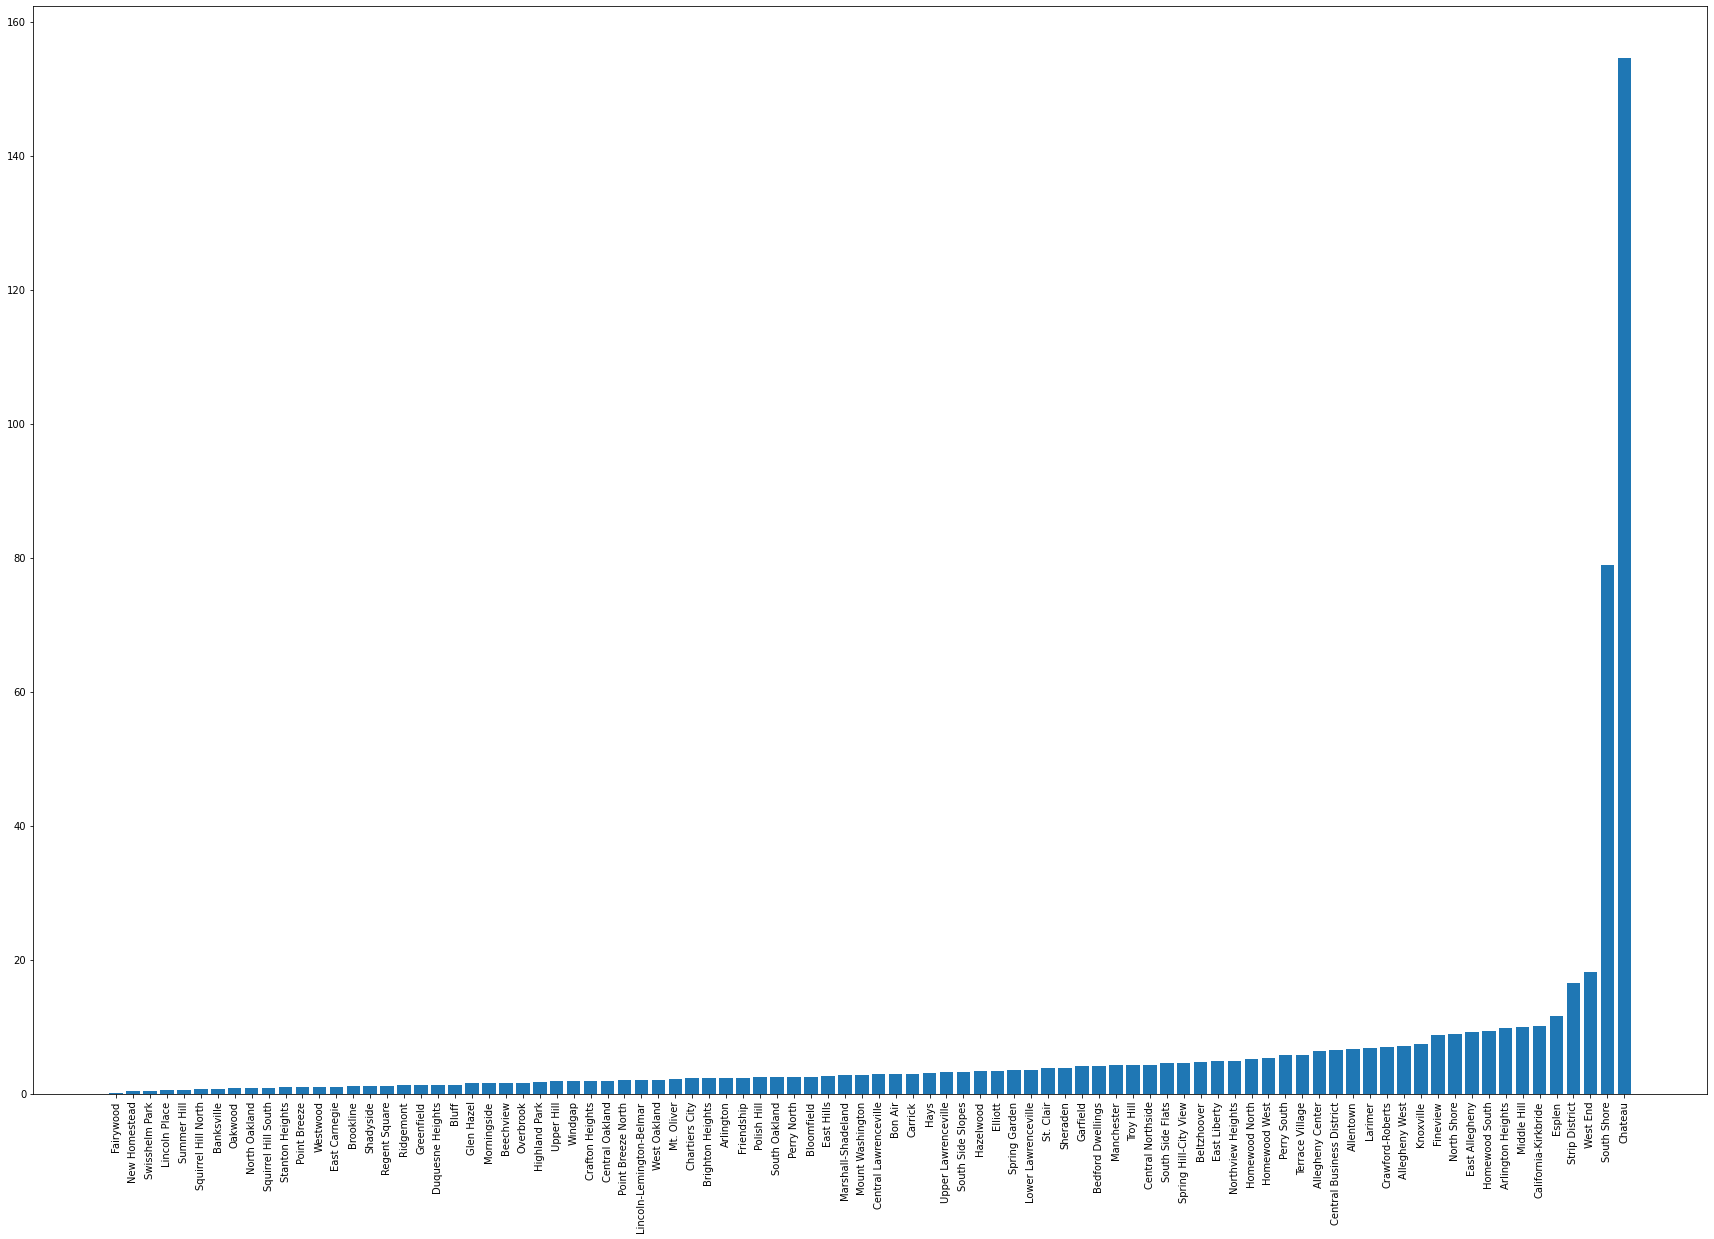

In [256]:
plt.figure(figsize = (30,20))
plt.xticks(rotation = 90)
plt.bar([name[0] for name in sorted_names_and_scores], [score[1] for score in sorted_names_and_scores] , color="C0", label = "scores")

# Conclusion
After a thorough analysis of the given data, we can conclude that the safest neighborhood is Fairywood. However, the rest of the neighborhoods are incredibly close, except for West End, South Shore, and Chateau. The methodology used in the analysis considers various factors such as murder, rape, robbery, drug use, assaults, and auto theft. I divided the total of the crimes by the neighborhood population to calculate a relative percentage of overall crime.